# Skaters (Season 2024/25) - Modeling distributions

## Step 0: Import libraries

In [19]:
import pandas as pd

In [20]:
from utils import df_utils, modeling_distributions_utils

## Step 1: Import the dataset

In [21]:
skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [22]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [23]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [25]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


In [26]:
df = df_utils.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = df_utils.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Step 4: The Binomial Negative Distribution

### Goals

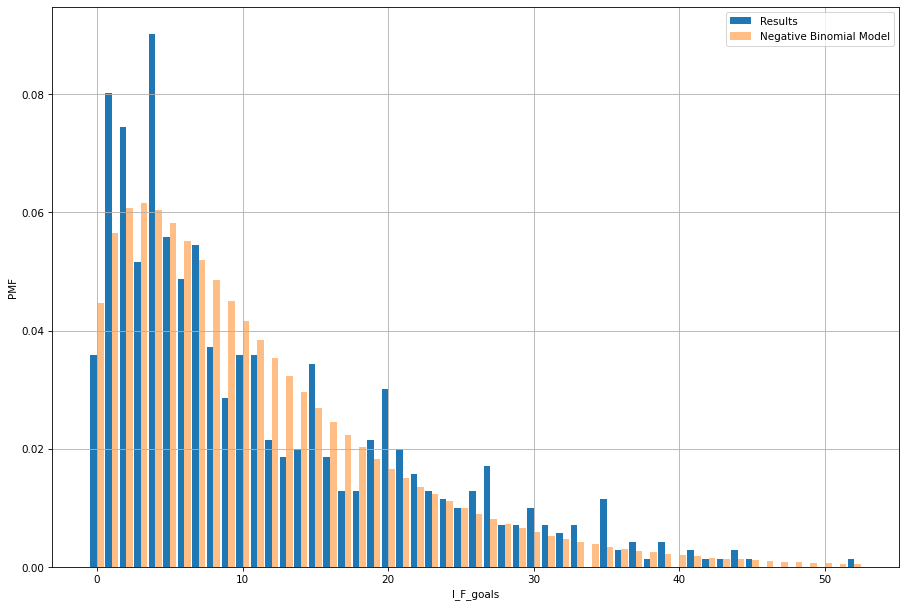

In [27]:
situation = "all"
feature = "I_F_goals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]

top_score = int(all_situations_df[feature].max())

modeling_distributions_utils.plot_negative_binomial(
    all_situations_df, 
    feature, 
    range(top_score+1),
    xlabel=feature)

### Points

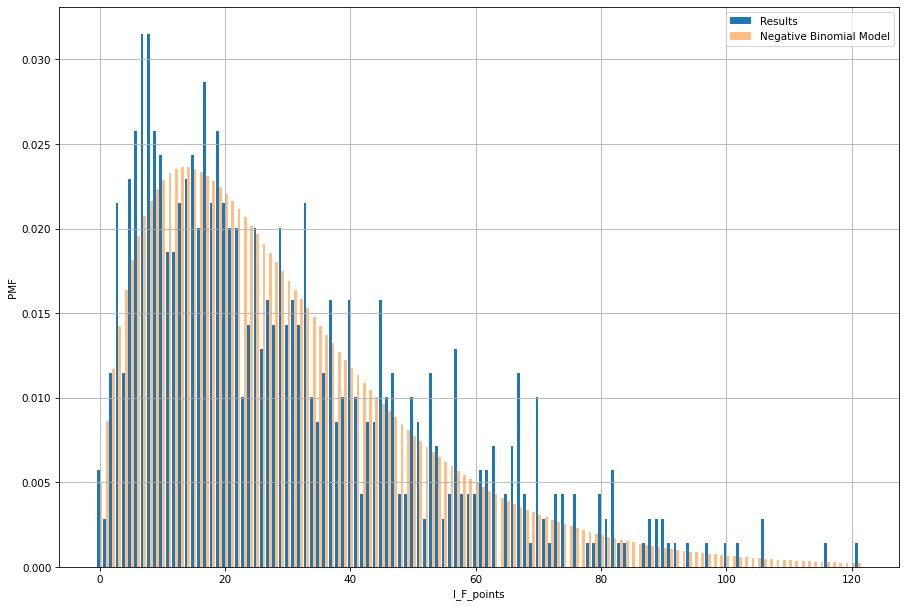

In [28]:
situation = "all"
feature = "I_F_points"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]

top_score = int(all_situations_df[feature].max())

modeling_distributions_utils.plot_negative_binomial(
    all_situations_df, 
    feature, 
    range(top_score+1),
    xlabel=feature)
